In [163]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
import cmath #for complex numbers
from scipy.linalg import eig

from scipy.spatial import distance_matrix
np.set_printoptions(linewidth=200)

In [164]:
dipole_vector_hat = np.array([0, 1, 0]) #i y retning 

In [165]:
points = np.array([
   #  [-8, 0, 0],
   #  [-7, 0, 0],
   #  [-6, 0, 0],
   #    [-5, 0, 0],
   #   [-4, 0, 0],
   #   [-3, 0, 0],
    [-2, 0, 0],
    [-1, 0, 0],
    [0, 0, 0],
    [1, 0, 0],
   [2, 0, 0],
   #  [3, 0, 0],
   #  [4, 0, 0],
   # [5, 0, 0],
   #  [6, 0, 0],
   #  [7, 0, 0],
   #  [8, 0, 0]
])

#distance_matrix = distance_matrix(points, points) eventuelt for hurtigere 
r_ij_vector = points[:, np.newaxis] - points
r_ij = np.linalg.norm(r_ij_vector, axis=2, keepdims=True)
r_ij_hat = np.divide(r_ij_vector, r_ij, out=np.zeros_like(r_ij_vector, dtype=float), where=(r_ij != 0)) 

k_e__r_ij_vector = 0.2 * np.pi * r_ij_vector 
k_e__r_ij = np.linalg.norm(k_e__r_ij_vector, axis=2, keepdims=True)

F = np.zeros(shape = (len(k_e__r_ij), len(k_e__r_ij)), dtype=complex)

for l in range(len(k_e__r_ij)): 
   dot_product = np.dot(r_ij_hat[l, :, :] , dipole_vector_hat)

   denom1 = (k_e__r_ij[l].flatten())
   denom2 = (k_e__r_ij[l].flatten())**2
   denom3 = (k_e__r_ij[l].flatten())**3
   safe_denom1 = np.where(denom1 == 0, np.nan, denom1)
   safe_denom2 = np.where(denom2 == 0, np.nan, denom2)
   safe_denom3 = np.where(denom3 == 0, np.nan, denom3)

   f_ji =  3/2 * (1 - (dot_product)**2) * np.sin(k_e__r_ij[l].flatten())/safe_denom1 \
      + 3/2 * (1 - 3 * (dot_product)**2) * (np.cos(k_e__r_ij[l].flatten())/safe_denom2 - np.sin(k_e__r_ij[l].flatten())/ safe_denom3) 
   g_ji = -3/2 * (1 - (dot_product)**2) * np.cos(k_e__r_ij[l].flatten())/safe_denom1 \
      + 3/2 * (1 - 3 * (dot_product)**2) * (np.sin(k_e__r_ij[l].flatten())/safe_denom2 + np.cos(k_e__r_ij[l].flatten())/ safe_denom3) 
   
   f_ji = np.nan_to_num(f_ji)
   g_ji = np.nan_to_num(g_ji)

   #Fill F
   F[:, l] = f_ji + 1j * g_ji 

I = np.eye(len(k_e__r_ij), dtype = complex)

A = - 1/2 * (I + F)


A_eigvals_right, A_right_eigvecs = np.linalg.eig(A)  # Right eigenvectors (columns)

# A_eigvals_left_dag, left_eigvecs_dag = np.linalg.eig(A.conj().T)  # Left eigenvectors (columns)

# A_eigvals_left = A_eigvals_left_dag.conj() #
# A_left_eigvecs = left_eigvecs_dag.conj()

# B_eigenvalues, B_left_eigvecs, B_right_eigvecs = eig(A, left=True, right=True)

# for eigenvalue in A_eigenvalues:
#    print(eigenvalue)

In [166]:
np.linalg.det(A)

(21.587080745063712+38.545486166368065j)

In [167]:
A_right_eigvecs_inv = np.linalg.inv(A_right_eigvecs)

In [168]:
tester = np.round(A_right_eigvecs_inv @ A_right_eigvecs, 14)
tester

array([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.-0.j, -0.-0.j],
       [ 0.-0.j,  1.-0.j, -0.-0.j,  0.-0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j],
       [ 0.-0.j, -0.-0.j,  0.-0.j,  1.-0.j,  0.-0.j],
       [-0.-0.j,  0.+0.j,  0.-0.j, -0.-0.j,  1.-0.j]])

In [169]:
is_identity = np.array_equal(tester, np.eye(A.shape[0]))
is_identity 

if is_identity != True:
    print('Something wrong in the inverse')

Start i en egentilstand og se, hvad vi får: 

In [170]:
A_right_eigvecs[:, 2]

array([-0.55649255-0.01535296j,  0.04453879-0.01081844j,  0.6131551 +0.j        ,  0.04453879-0.01081844j, -0.55649255-0.01535296j])

In [171]:
np.round(A_right_eigvecs_inv @ A_right_eigvecs[:, 2], 14)

array([ 0.+0.j, -0.-0.j,  1.+0.j,  0.-0.j,  0.-0.j])

Altså gør den præcis som forventet og skifter fra $|i>$-basen, hvor  $\lambda_j = \sum^N c_i |i>$ til lambda basen, hvor vi blot har $1|\lambda_j> = (0, 0, .., 1, .. 0)$ med 1 på j'te plads. Da vi jo blot i dette check startede i $\lambda_j$ tilstanden i $|i>$-basen. Så giver mening vi i $|\lambda>$-basen bare har 1 på den plads.

Gå tilbage til i-base er så blot $\Lambda^R (0,0,...,1, ..,0) = |\lambda_j>$

Lad os nu prøve at starte med en enkelt excitation på det første site. ALtså $|\psi> = |1>$

In [172]:
first_site_excited_ibase = np.zeros(len(A))
first_site_excited_ibase[0] = 1

Changing to the $|\lambda >$-base. 

In [173]:
first_site_excited_lambdabase = A_right_eigvecs_inv @ first_site_excited_ibase

Now getting the time evolution

In [174]:
t = np.linspace(0, 20, 250)  # Shape (100,)
coeff_evolution_lambdabase = first_site_excited_lambdabase[:, np.newaxis] * np.exp(A_eigvals_right[:, np.newaxis] * t)

Switching back to the i-base

In [175]:
coeff_evolution_ibase = A_right_eigvecs @ coeff_evolution_lambdabase    #slice like coeff_evolution_ibase[0,:] to get evolution of single one

Thus taking the norm square we get that the probability of being on each site at t evolves like. 

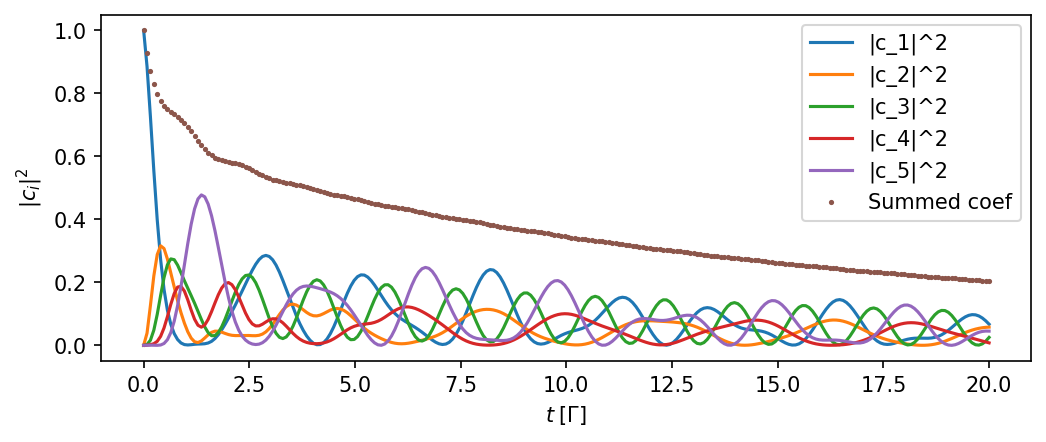

In [176]:
prob_exc_sites_t = coeff_evolution_ibase * coeff_evolution_ibase.conj()
plt.figure(figsize=(8,3), dpi=150)
for i in range(len(A)): 
    plt.plot(t, prob_exc_sites_t[i,:].real, label = f"|c_{i+1}|^2")
plt.plot(t, np.sum(prob_exc_sites_t.real, axis=0), '.', markersize = 3, label = 'Summed coef') #all complex part are 0 just due to numerical precision we take .real
plt.xlabel(r"$t \; [\Gamma]$")
plt.ylabel(r'$|c_i|^2$')
plt.legend();

De højre egenvektorer opfylder $Av = \lambda v$. For de venstre har vi $A^\dagger w^\dagger = k^* w^\dagger$, så ved at tage dagger på begge sider: $wA=kw$. Ved blot at få python til at finde højre egenvektorer for hhv. $A$ og $A^\dagger$ får jeg to matricer med egenvektorne i kolonnerne. Jf. ovenstående er de venstre egenvektorer for $A$  ($w$'erne) så lig den konjugerede (behøver ikke transponere her, da arrangeret i matrice) af højre egenvektorne for $A^\dagger$ og venstre egenværdi er lig med den konjugerede af højre egenværdi for $A^\dagger$. 

Men når jeg så får python til at finde $\lambda$, $k^*$ og matricen med $v$'er og matricen med $w^*$'er og jeg kompleks konjugerer $k^*$ og $w^*$ for at at få dem i relation til $A$ og ikke $A^\dagger$ så får jeg, at det er de samme egenværdier og samme egentilstande. Kan ses nedenfor

In [178]:
A_left_eigvecs @ A_right_eigvecs

NameError: name 'A_left_eigvecs' is not defined

In [ ]:
?eig

Signature:
eig(
    a,
    b=None,
    left=False,
    right=True,
    overwrite_a=False,
    overwrite_b=False,
    check_finite=True,
    homogeneous_eigvals=False,
)
Docstring:
Solve an ordinary or generalized eigenvalue problem of a square matrix.

Find eigenvalues w and right or left eigenvectors of a general matrix::

    a   vr[:,i] = w[i]        b   vr[:,i]
    a.H vl[:,i] = w[i].conj() b.H vl[:,i]

where ``.H`` is the Hermitian conjugation.

Parameters
----------
a : (M, M) array_like
    A complex or real matrix whose eigenvalues and eigenvectors
    will be computed.
b : (M, M) array_like, optional
    Right-hand side matrix in a generalized eigenvalue problem.
    Default is None, identity matrix is assumed.
left : bool, optional
    Whether to calculate and return left eigenvectors.  Default is False.
right : bool, optional
    Whether to calculate and return right eigenvectors.  Default is True.
overwrite_a : bool, optional
    Whether to overwrite `a`; may improve perfor

In [ ]:
A

array([[-0.5       +0.j        , -0.46134842-2.59709387j, -0.35493593-0.384059j  , -0.20668068-0.28910337j, -0.05157598-0.27299359j],
       [-0.46134842-2.59709387j, -0.5       +0.j        , -0.46134842-2.59709387j, -0.35493593-0.384059j  , -0.20668068-0.28910337j],
       [-0.35493593-0.384059j  , -0.46134842-2.59709387j, -0.5       +0.j        , -0.46134842-2.59709387j, -0.35493593-0.384059j  ],
       [-0.20668068-0.28910337j, -0.35493593-0.384059j  , -0.46134842-2.59709387j, -0.5       +0.j        , -0.46134842-2.59709387j],
       [-0.05157598-0.27299359j, -0.20668068-0.28910337j, -0.35493593-0.384059j  , -0.46134842-2.59709387j, -0.5       +0.j        ]])

In [ ]:
A_eigvals_left == A_eigvals_right

array([ True,  True,  True,  True,  True])

In [ ]:
A_right_eigvecs

array([[ 3.35519539e-01-1.93020791e-02j,  5.07686246e-01+0.00000000e+00j, -5.56492550e-01-1.53529623e-02j,  2.77808661e-01+2.41472696e-03j, -4.91238372e-01-3.06518830e-02j],
       [ 4.91820968e-01-6.05107642e-03j,  4.91238372e-01+3.06518830e-02j,  4.45387902e-02-1.08184423e-02j, -5.05987929e-01+3.03021862e-03j,  5.07686246e-01+0.00000000e+00j],
       [ 5.38757066e-01+0.00000000e+00j, -1.40216003e-16+8.50377567e-17j,  6.13155096e-01+0.00000000e+00j,  5.77552682e-01+0.00000000e+00j, -7.49854382e-17-1.17968045e-16j],
       [ 4.91820968e-01-6.05107642e-03j, -4.91238372e-01-3.06518830e-02j,  4.45387902e-02-1.08184423e-02j, -5.05987929e-01+3.03021862e-03j, -5.07686246e-01+3.88578059e-16j],
       [ 3.35519539e-01-1.93020791e-02j, -5.07686246e-01-1.94289029e-16j, -5.56492550e-01-1.53529623e-02j,  2.77808661e-01+2.41472696e-03j,  4.91238372e-01+3.06518830e-02j]])

In [ ]:
np.round(A_left_eigvecs * A_right_eigvecs, 7)

array([[ 0.1122008-0.0129524j,  0.2577453+0.j       ,  0.3094482+0.0170876j,  0.0771718+0.0013417j,  0.2403756+0.0301148j],
       [ 0.2418512-0.0059521j,  0.2403756+0.0301148j,  0.0018667-0.0009637j,  0.2560146-0.0030665j,  0.2577453+0.j       ],
       [ 0.2902592+0.j       ,  0.       -0.j       ,  0.3759592+0.j       ,  0.3335671+0.j       , -0.       +0.j       ],
       [ 0.2418512-0.0059521j,  0.2403756+0.0301148j,  0.0018667-0.0009637j,  0.2560146-0.0030665j,  0.2577453-0.j       ],
       [ 0.1122008-0.0129524j,  0.2577453+0.j       ,  0.3094482+0.0170876j,  0.0771718+0.0013417j,  0.2403756+0.0301148j]])

In [ ]:
A_left_eigvecs - A_right_eigvecs

array([[0.+0.j, 0.-0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.-0.j],
       [0.-0.j, 0.+0.j, 0.-0.j, 0.-0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]])

Altså at højre og venstre egentilstande er ens og at højre og venstre egenværdier er ens. Troede kun det var tilfældet, hvis min matrice var hermitisk. 

Når jeg så prøver at gange samme og få identitets matricen, så har jeg: 

Enten (men er jo bare at gange hver egentilstand med sig selv, da de jo er lig hinanden): 

In [ ]:
np.round(A_right_eigvecs.T @ A_right_eigvecs, 7) 

array([[ 0.9983633-0.0378091j,  0.       +0.j       ,  0.       -0.j       , -0.       +0.j       ,  0.       +0.j       ],
       [ 0.       +0.j       ,  0.9962418+0.0602295j, -0.       -0.j       ,  0.       +0.j       , -0.       -0.j       ],
       [ 0.       -0.j       , -0.       -0.j       ,  0.998589 +0.0322479j,  0.       +0.j       ,  0.       +0.j       ],
       [-0.       +0.j       ,  0.       +0.j       ,  0.       +0.j       ,  0.9999399-0.0034497j, -0.       -0.j       ],
       [ 0.       +0.j       , -0.       -0.j       ,  0.       +0.j       , -0.       -0.j       ,  0.9962418+0.0602295j]])

In [ ]:
np.round(A_left_eigvecs.T @ A_right_eigvecs, 7) 

array([[ 0.9983633-0.0378091j,  0.       +0.j       ,  0.       -0.j       , -0.       +0.j       ,  0.       +0.j       ],
       [ 0.       +0.j       ,  0.9962418+0.0602295j, -0.       -0.j       ,  0.       +0.j       , -0.       -0.j       ],
       [ 0.       -0.j       , -0.       -0.j       ,  0.998589 +0.0322479j,  0.       +0.j       ,  0.       +0.j       ],
       [-0.       +0.j       ,  0.       +0.j       ,  0.       +0.j       ,  0.9999399-0.0034497j, -0.       -0.j       ],
       [ 0.       +0.j       , -0.       -0.j       ,  0.       +0.j       , -0.       -0.j       ,  0.9962418+0.0602295j]])

Eller (tror nærmere den her, da det svarer til $<w|v>$ i normale indre produkt forstand, hvor w så bliver kompleks)

In [ ]:
np.round(A_left_eigvecs.conj().T @ A_right_eigvecs, 7) 

array([[ 1.0000e+00-0.j       ,  0.0000e+00-0.j       ,  1.4472e-03-0.0418878j, -2.5980e-04+0.0092021j,  0.0000e+00+0.j       ],
       [ 0.0000e+00+0.j       ,  1.0000e+00+0.j       , -0.0000e+00-0.j       ,  0.0000e+00+0.j       , -0.0000e+00-0.0622462j],
       [ 1.4472e-03+0.0418878j, -0.0000e+00+0.j       ,  1.0000e+00-0.j       , -2.7940e-04-0.0048353j,  0.0000e+00-0.j       ],
       [-2.5980e-04-0.0092021j,  0.0000e+00-0.j       , -2.7940e-04+0.0048353j,  1.0000e+00+0.j       , -0.0000e+00+0.j       ],
       [ 0.0000e+00-0.j       , -0.0000e+00+0.0622462j,  0.0000e+00+0.j       , -0.0000e+00-0.j       ,  1.0000e+00-0.j       ]])

Så bliver diagonalen god, men får elementer udenfor, der ikke går til 0. 
<br> Er som om, at i forstanden $w_i v_j = 0$ med dotprodukt som i simpel linear algebra (altså intet kompleks), men her har man $w_i v_i \neq 1$ 
<br> Mens at hvis man tager normalt dot produkt (altså med kompleks), så har man, at det modsatte er sandt; $w_i^* v_j \neq 0$ (i hvert fald ikke altid), men derimod $w_i^* v_i = 1$

Altså A er jo symmetrisk, men ikke hermitisk, så forstår ikke hvorfor, jeg får de her ting.

Med B metoden

In [ ]:
A_right_eigvecs == B_right_eigvecs

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

Et eller andet bemærkelsesværdigt med måderne at finde venstre egentilstande på. I den anden metode er de ikke en til en de samme. Se næste to linjer kode.

In [ ]:
np.round(A_left_eigvecs,7) == np.round(B_left_eigvecs,7)

array([[False, False, False, False, False],
       [False, False, False, False,  True],
       [ True,  True,  True,  True,  True],
       [False, False, False, False,  True],
       [False, False, False, False, False]])

In [ ]:
np.round(A_left_eigvecs.conj(),7) == np.round(B_left_eigvecs,7)

array([[ True, False,  True,  True,  True],
       [ True, False,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True, False,  True,  True,  True],
       [ True, False,  True,  True,  True]])

Er både en konjugering (da A_left_eigvecs allerede er konjugerede en gang fra de oprindelige left_eigvecs_dag) og en søjle til forskel? <br> Måske noget dimension, der mangler i den anden gemt her? Omvendt nok også den der er skyld i, at vi får et -1 på diagonalen. 

In [ ]:

np.round(A_left_eigvecs,7) - np.round(B_left_eigvecs,7)

array([[ 0.       -0.0386042j,  1.0153724+0.j       ,  0.       -0.030706j ,  0.       +0.0048294j,  0.       -0.0613038j],
       [ 0.       -0.0121022j,  0.9824768+0.j       ,  0.       -0.0216368j,  0.       +0.0060604j,  0.       -0.j       ],
       [ 0.       -0.j       , -0.       +0.j       ,  0.       -0.j       ,  0.       -0.j       ,  0.       +0.j       ],
       [ 0.       -0.0121022j, -0.9824768+0.j       ,  0.       -0.0216368j,  0.       +0.0060604j,  0.       +0.j       ],
       [ 0.       -0.0386042j, -1.0153724-0.j       ,  0.       -0.030706j ,  0.       +0.0048294j,  0.       +0.0613038j]])

In [ ]:
np.round(B_left_eigvecs.conj().T @ B_right_eigvecs, 7)

array([[ 0.9983633-0.0378091j, -0.       -0.j       ,  0.       -0.j       , -0.       -0.j       ,  0.       +0.j       ],
       [ 0.       -0.j       , -0.9962418-0.0602295j,  0.       +0.j       , -0.       -0.j       ,  0.       +0.j       ],
       [-0.       +0.j       , -0.       +0.j       ,  0.998589 +0.0322479j, -0.       +0.j       , -0.       -0.j       ],
       [ 0.       +0.j       ,  0.       -0.j       ,  0.       -0.j       ,  0.9999399-0.0034497j, -0.       +0.j       ],
       [ 0.       -0.j       , -0.       +0.j       ,  0.       +0.j       , -0.       -0.j       ,  0.9962418+0.0602295j]])

In [ ]:
np.round(B_left_eigvecs.T @ B_right_eigvecs, 7)

array([[ 1.0000e+00-0.j       , -0.0000e+00+0.j       ,  1.4472e-03-0.0418878j, -2.5980e-04+0.0092021j,  0.0000e+00-0.j       ],
       [ 0.0000e+00-0.j       , -1.0000e+00-0.j       ,  0.0000e+00+0.j       , -0.0000e+00-0.j       ,  0.0000e+00+0.0622462j],
       [ 1.4472e-03+0.0418878j, -0.0000e+00+0.j       ,  1.0000e+00+0.j       , -2.7940e-04-0.0048353j, -0.0000e+00-0.j       ],
       [-2.5980e-04-0.0092021j,  0.0000e+00+0.j       , -2.7940e-04+0.0048353j,  1.0000e+00-0.j       , -0.0000e+00-0.j       ],
       [ 0.0000e+00+0.j       , -0.0000e+00+0.0622462j,  0.0000e+00+0.j       , -0.0000e+00-0.j       ,  1.0000e+00-0.j       ]])